In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

heartData = pd.read_csv("heart-failure-prediction/heart.csv")
heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
#Aussortieren von leeren Cholesterin Beobachtungen
heartData = heartData[heartData["Cholesterol"]!=0]

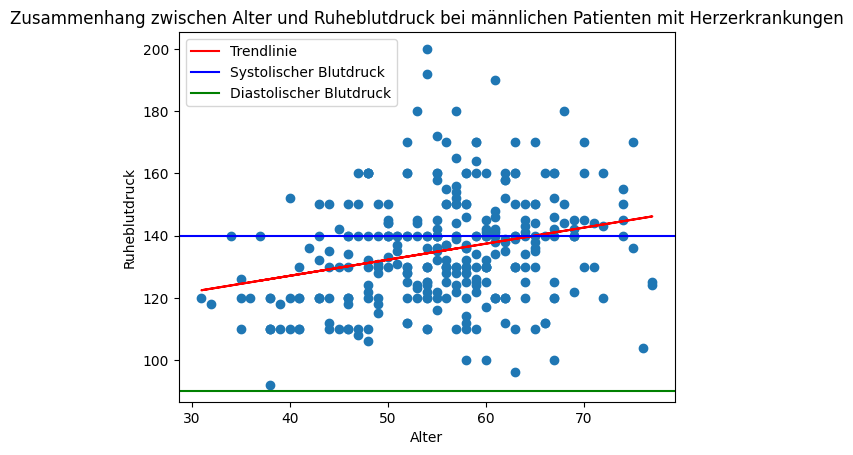

In [3]:
unhealthyData = heartData[(heartData["HeartDisease"] == 1) & (heartData["Sex"] == "M")]

plt.title("Zusammenhang zwischen Alter und Ruheblutdruck bei männlichen Patienten mit Herzerkrankungen")
plt.scatter(unhealthyData["Age"], unhealthyData["RestingBP"])
m, b = np.polyfit(unhealthyData["Age"], unhealthyData["RestingBP"], 1)
plt.plot(unhealthyData["Age"], m*unhealthyData["Age"] + b, color='red', label='Trendlinie')
plt.axhline(y=140, color='blue', linestyle='-', label='Systolischer Blutdruck')
plt.axhline(y=90, color='green', linestyle='-', label='Diastolischer Blutdruck')
plt.xlabel("Alter")
plt.ylabel("Ruheblutdruck")
plt.legend()
plt.show()

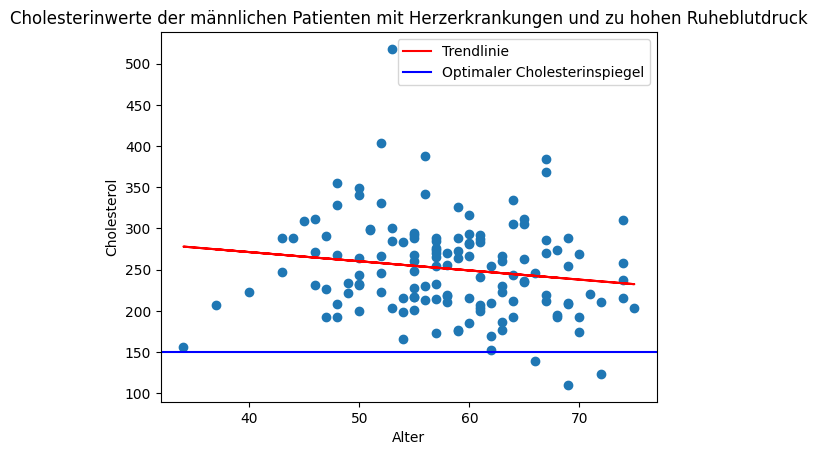

Durchschnittlicher Cholesterinwert: 251.05797101449275
Anzahl der männlichen Patienten mit Herzerkrankungen und zu hohen Ruheblutdruck: 138


In [4]:
systolic = heartData[(heartData["HeartDisease"] == 1) & (heartData["Sex"] == "M") & (heartData["RestingBP"] >= 140)]

plt.title("Cholesterinwerte der männlichen Patienten mit Herzerkrankungen und zu hohen Ruheblutdruck")
plt.scatter(systolic["Age"], systolic["Cholesterol"])
m, b = np.polyfit(systolic["Age"], systolic["Cholesterol"], 1)
plt.plot(systolic["Age"], m*systolic["Age"] + b, color='red', label='Trendlinie')
plt.axhline(y=150, color='blue', linestyle='-', label='Optimaler Cholesterinspiegel')
plt.xlabel("Alter")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()

print("Durchschnittlicher Cholesterinwert: "+str(systolic["Cholesterol"].mean()))
print("Anzahl der männlichen Patienten mit Herzerkrankungen und zu hohen Ruheblutdruck: " + str(len(systolic)))

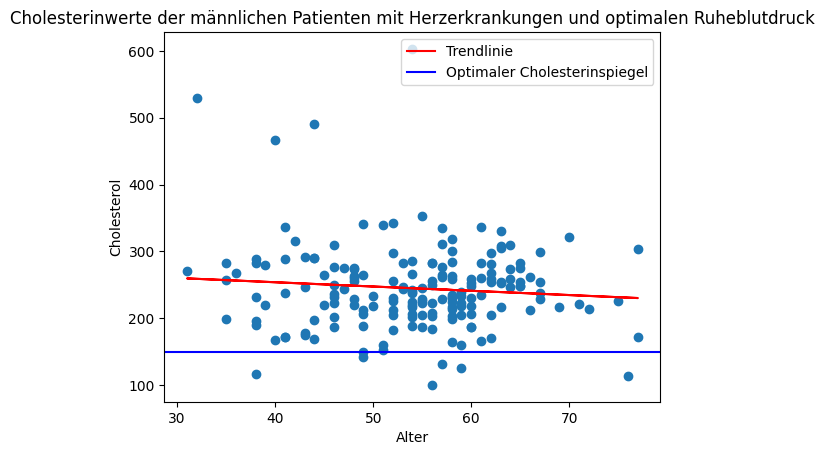

Durchschnittlicher Cholesterinwert: 244.74719101123594
Anzahl der männlichen Patienten mit Herzerkrankungen und optimalen Ruheblutdruck: 178


In [5]:
optimalRestingBP = heartData[(heartData["HeartDisease"] == 1) & (heartData["Sex"] == "M") & (heartData["RestingBP"] < 140) & (heartData["RestingBP"] > 90)]

plt.title("Cholesterinwerte der männlichen Patienten mit Herzerkrankungen und optimalen Ruheblutdruck")
plt.scatter(optimalRestingBP["Age"], optimalRestingBP["Cholesterol"])
m, b = np.polyfit(optimalRestingBP["Age"], optimalRestingBP["Cholesterol"], 1)
plt.plot(optimalRestingBP["Age"], m*optimalRestingBP["Age"] + b, color='red', label='Trendlinie')
plt.axhline(y=150, color='blue', linestyle='-', label='Optimaler Cholesterinspiegel')
plt.xlabel("Alter")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()
print("Durchschnittlicher Cholesterinwert: "+str(optimalRestingBP["Cholesterol"].mean()))
print("Anzahl der männlichen Patienten mit Herzerkrankungen und optimalen Ruheblutdruck: " + str(len(optimalRestingBP)))

## Zusammenhang Cholesterin und Bluthochdruck
Patienten mit zu hohen und "optimalen" Bluthochdruck haben beide einen zu hohen Cholesterinspiegel. Es ist nicht möglich nur durch Cholesterinwert zu schließen, ob der Patient einen zu hohen Bluthochdruck hat. Auch Menschen mit "gesunden" Cholesterinspiegel können Herzkreislauf erkrankt sein.

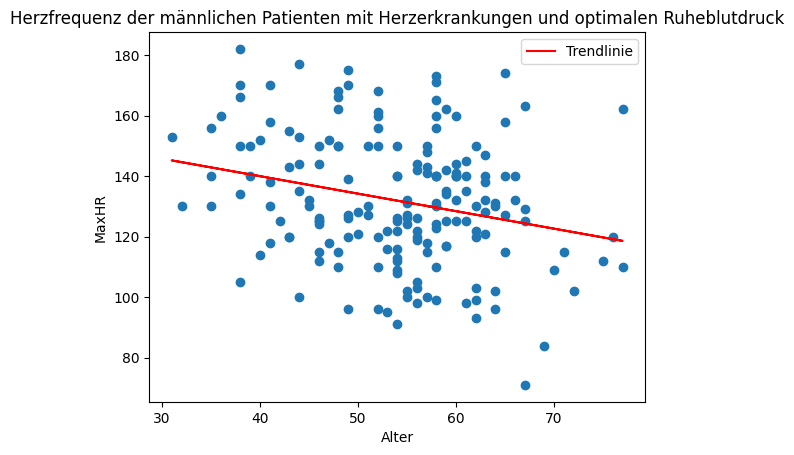

Durchschnittliche Herzfrequenz: 131.86516853932585


In [6]:
plt.title("Herzfrequenz der männlichen Patienten mit Herzerkrankungen und optimalen Ruheblutdruck")
plt.scatter(optimalRestingBP["Age"], optimalRestingBP["MaxHR"])
m, b = np.polyfit(optimalRestingBP["Age"], optimalRestingBP["MaxHR"], 1)
plt.plot(optimalRestingBP["Age"], m*optimalRestingBP["Age"] + b, color='red', label='Trendlinie')
plt.xlabel("Alter")
plt.ylabel("MaxHR")
plt.legend()
plt.show()

print("Durchschnittliche Herzfrequenz: "+str(optimalRestingBP["MaxHR"].mean()))

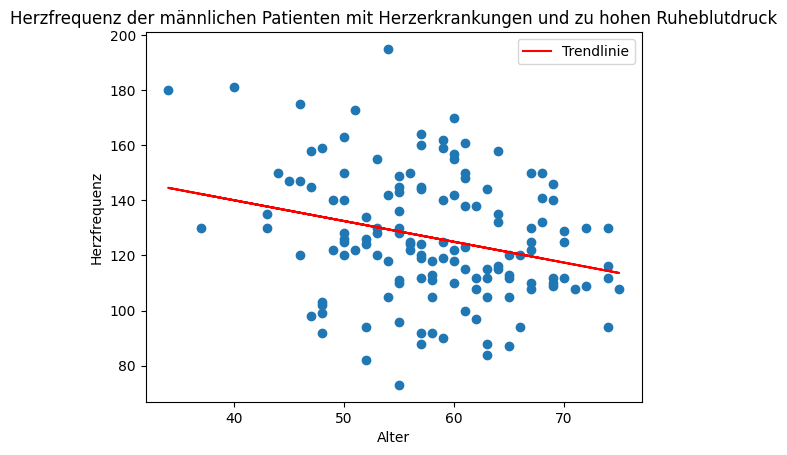

Durchschnittliche Herzfrequenz: 126.33333333333333


In [7]:
plt.title("Herzfrequenz der männlichen Patienten mit Herzerkrankungen und zu hohen Ruheblutdruck")
plt.scatter(systolic["Age"], systolic["MaxHR"])
m, b = np.polyfit(systolic["Age"], systolic["MaxHR"], 1)
plt.plot(systolic["Age"], m*systolic["Age"] + b, color='red', label='Trendlinie')
plt.xlabel("Alter")
plt.ylabel("Herzfrequenz")
plt.legend()
plt.show()

print("Durchschnittliche Herzfrequenz: "+str(systolic["MaxHR"].mean()))

## Zusammenhang Herfrequenz und Bluthochdruck
Auch hier ist es nicht möglich nur durch die Herfrequenz zu schließen, ob der Patient einen zu hohen Bluthochdruck hat.

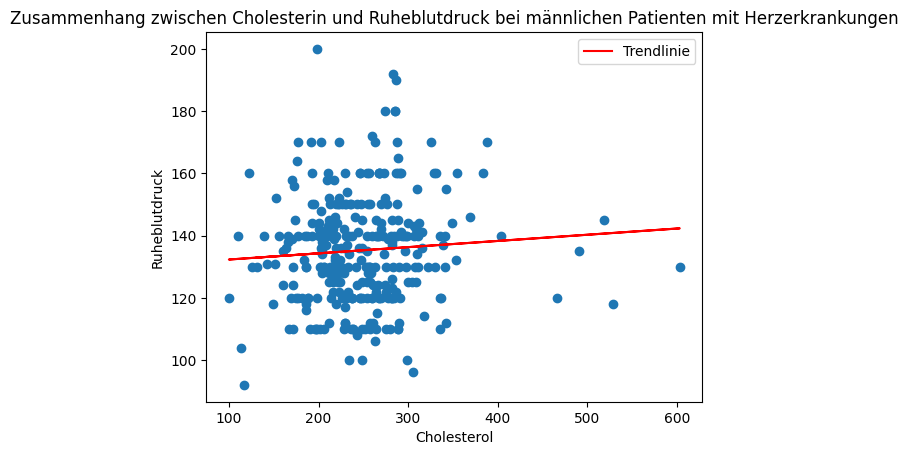

Der Korrelationskoeffizient zwischen Cholesterol und RestingBP ist: 0.07088119370833003. Daher ist Cholesterin und Ruheblutdruck linear unabhängig


In [8]:
plt.title("Zusammenhang zwischen Cholesterin und Ruheblutdruck bei männlichen Patienten mit Herzerkrankungen")
plt.scatter(unhealthyData["Cholesterol"], unhealthyData["RestingBP"])
m, b = np.polyfit(unhealthyData["Cholesterol"], unhealthyData["RestingBP"], 1)
plt.plot(unhealthyData["Cholesterol"], m*unhealthyData["Cholesterol"] + b, color='red', label='Trendlinie')
plt.xlabel("Cholesterol")
plt.ylabel("Ruheblutdruck")
plt.legend()
plt.show()

correlation = unhealthyData['Cholesterol'].corr(unhealthyData['RestingBP'])
print(f"Der Korrelationskoeffizient zwischen Cholesterol und RestingBP ist: {correlation}. Daher ist Cholesterin und Ruheblutdruck linear unabhängig")

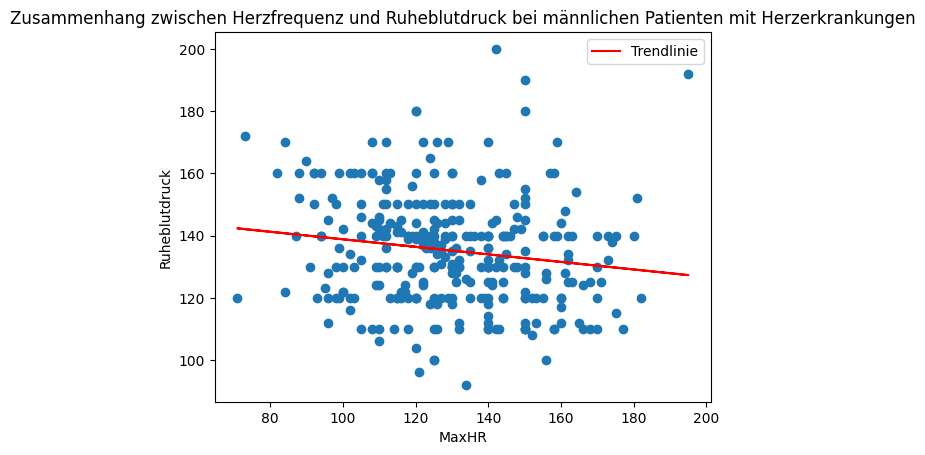

Der Korrelationskoeffizient zwischen Herzfrequenz und Ruheblutdruck ist: -0.15432683934515454. Daher ist Cholesterin und Ruheblutdruck linear unabhängig


In [9]:
plt.title("Zusammenhang zwischen Herzfrequenz und Ruheblutdruck bei männlichen Patienten mit Herzerkrankungen")
plt.scatter(unhealthyData["MaxHR"], unhealthyData["RestingBP"])
m, b = np.polyfit(unhealthyData["MaxHR"], unhealthyData["RestingBP"], 1)
plt.plot(unhealthyData["MaxHR"], m*unhealthyData["MaxHR"] + b, color='red', label='Trendlinie')
plt.xlabel("MaxHR")
plt.ylabel("Ruheblutdruck")
plt.legend()
plt.show()

correlation = unhealthyData['MaxHR'].corr(unhealthyData['RestingBP'])
print(f"Der Korrelationskoeffizient zwischen Herzfrequenz und Ruheblutdruck ist: {correlation}. Daher ist Cholesterin und Ruheblutdruck linear unabhängig")

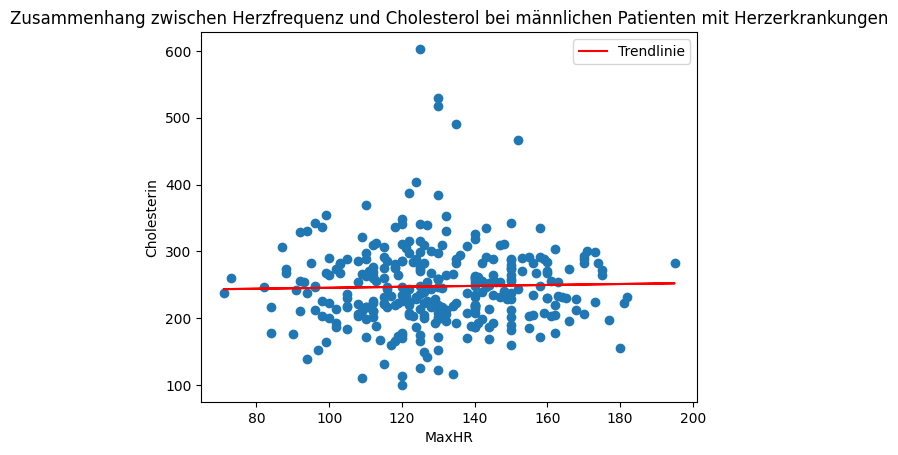

Der Korrelationskoeffizient zwischen Herzfrequenz und Cholesterol ist: 0.02522611419670919. Cholesterin und Herzfrequenz  sind linear unabhängig


In [10]:
plt.title("Zusammenhang zwischen Herzfrequenz und Cholesterol bei männlichen Patienten mit Herzerkrankungen")
plt.scatter(unhealthyData["MaxHR"], unhealthyData["Cholesterol"])
m, b = np.polyfit(unhealthyData["MaxHR"], unhealthyData["Cholesterol"], 1)
plt.plot(unhealthyData["MaxHR"], m*unhealthyData["MaxHR"] + b, color='red', label='Trendlinie')
plt.xlabel("MaxHR")
plt.ylabel("Cholesterin")
plt.legend()
plt.show()

correlation = unhealthyData['MaxHR'].corr(unhealthyData['Cholesterol'])
print(f"Der Korrelationskoeffizient zwischen Herzfrequenz und Cholesterol ist: {correlation}. Cholesterin und Herzfrequenz  sind linear unabhängig")

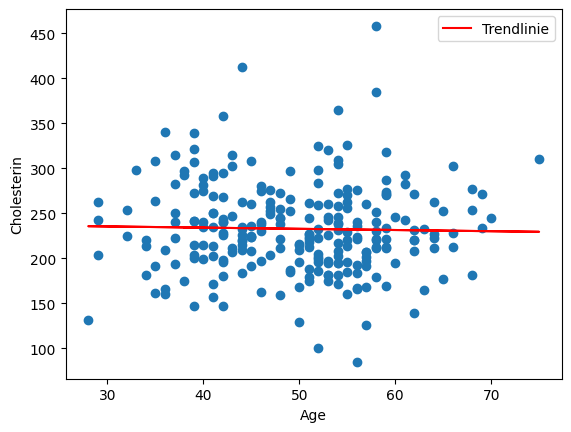

Korrelationsmatrix:
                  Age  Cholesterol
Age          1.000000    -0.023995
Cholesterol -0.023995     1.000000


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.0
mean,49.629032,130.963710,232.806452,0.133065,148.987903,0.368548,0.0
std,9.103959,15.792772,50.240342,0.340331,23.969191,0.697464,0.0
min,28.000000,94.000000,85.000000,0.000000,69.000000,-0.100000,0.0
25%,42.000000,120.000000,200.750000,0.000000,135.750000,0.000000,0.0
50%,51.000000,130.000000,227.000000,0.000000,150.000000,0.000000,0.0
75%,56.000000,140.000000,261.250000,0.000000,168.000000,0.400000,0.0
max,75.000000,190.000000,458.000000,1.000000,202.000000,4.200000,0.0


In [11]:
healthyData = heartData[(heartData["HeartDisease"] == 0) & (heartData["Sex"] == "M")]
correlation_matrix = healthyData[['Age', "Cholesterol"]].corr()

plt.title("")
plt.scatter(healthyData["Age"], healthyData["Cholesterol"])
m, b = np.polyfit(healthyData["Age"], healthyData["Cholesterol"], 1)
plt.plot(healthyData["Age"], m*healthyData["Age"] + b, color='red', label='Trendlinie')
plt.xlabel("Age")
plt.ylabel("Cholesterin")
plt.legend()
plt.show()

print('Korrelationsmatrix:')
print(correlation_matrix)
healthyData.describe()